In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import zscore
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from datetime import datetime
import warnings
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 500)
pd.set_option('expand_frame_repr', True)

# 1.Data prep

##### Nesta etapa inicial, são realizadas a importação da base de dados e sua inspeção de características; preparação dos dados para a etapa de modelagem, o que inclui verificação e tratamento de valores nulos e duplicados; estabilidade de variáveis e separação da base em amostras para desenvolvimento e teste do modelo

## 1.1 Importação, inspeção  e tratamento da base

In [7]:
#Importando a base do modelo
base_modelo=pd.read_csv(f'base_modelo.csv')
base_modelo.head()

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_30,VAR_31,VAR_32,VAR_33,VAR_34,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_65,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
0,1,201404,0,0.0,0.0,0.0,0.0,124.54,3277.0,51.98,NaN,500.00,153.0,NaN,299.0,73.26,1024.0,26.98,162.0,3000.0,72.0,45.0,8,1279.0,63.0,77.67,492.84,12.0,845.0,NaN,12.0,16.0,500.00,22.0,0.133833,18.0,NaN,NaN,0.0,16.0,220.84,348.0,9.0,9.57,33.0,19.0,11.0,512.82,36.0,0.0,16.0,0.0,159.28,379.0,53.97,3380.00,500.00,159.28,159.28,45,369.0,95.54,-0.030478,0.00,2508.0,159.28,0,1303.79,8.0,-69.0,16.0,156.38,7.52,0.0,151.0,0.0,3.0,477.84,173.06,0.00,3.0
1,2,201407,0,64.0,0.0,2.0,1.0,47.92,2443.0,84.72,NaN,1000.00,649.0,NaN,224.0,38.53,NaN,NaN,84.0,NaN,50.0,18.0,12,1063.0,31.0,177.39,335.44,9.0,NaN,842.0,10.0,NaN,1000.00,14.0,0.133833,13.0,NaN,NaN,NaN,NaN,338.90,179.0,5.0,NaN,NaN,19.0,9.0,269.71,NaN,0.0,NaN,NaN,NaN,NaN,NaN,1000.00,2000.00,NaN,NaN,60,228.0,97.73,0.357324,NaN,836.0,NaN,0,1486.26,24.0,NaN,NaN,707.84,NaN,NaN,187.0,NaN,NaN,NaN,184.69,54.00,NaN
2,3,201405,0,99.0,2.0,2.0,2.0,80.38,1824.0,26.63,NaN,1893.35,346.0,29.98,106.0,NaN,NaN,73.55,8.0,NaN,3.0,2.0,12,116.0,4.0,140.25,362.71,3.0,NaN,597.0,5.0,NaN,1893.35,NaN,0.133833,2.0,NaN,59.97,NaN,NaN,133.17,NaN,4.0,NaN,NaN,3.0,12.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,294.20,1893.35,1893.35,NaN,NaN,31,264.0,294.57,-0.411787,NaN,NaN,NaN,0,800.27,18.0,NaN,NaN,471.86,NaN,NaN,96.0,NaN,NaN,NaN,732.00,121.98,NaN
3,4,201412,0,0.0,0.0,0.0,0.0,10.58,3796.0,NaN,NaN,3000.00,119.0,NaN,NaN,NaN,1609.0,NaN,36.0,1500.0,17.0,11.0,12,255.0,14.0,29.99,74.06,0.0,1238.0,NaN,0.0,5.0,3000.00,12.0,0.133833,3.0,NaN,NaN,0.0,-1.0,NaN,NaN,5.0,NaN,7.0,NaN,6.0,NaN,7.0,0.0,NaN,NaN,NaN,594.0,NaN,3000.00,7000.00,287.31,NaN,76,49.0,NaN,0.721630,5.75,NaN,287.31,0,NaN,4.0,-133.0,NaN,119.96,23.00,0.0,417.0,0.0,0.0,NaN,NaN,0.00,0.0
4,5,201403,1,0.0,0.0,0.0,0.0,70.46,437.0,40.69,10.99,2000.00,NaN,62.78,NaN,NaN,288.0,29.58,NaN,NaN,NaN,0.0,12,NaN,0.0,NaN,493.22,0.0,43.0,NaN,0.0,-9.0,2000.00,0.0,0.090634,0.0,10.99,313.91,0.0,-9.0,326.89,NaN,0.0,0.00,-9.0,NaN,0.0,NaN,-9.0,NaN,-16.0,0.0,182.89,288.0,147.94,2946.29,2946.29,182.89,182.89,38,332.0,NaN,-0.231735,NaN,NaN,NaN,1,1457.78,NaN,-272.0,-16.0,NaN,NaN,0.0,75.0,0.0,0.0,914.45,NaN,NaN,0.0


In [8]:
#Verificando algumas informações do dataset
base_modelo.info()
base_modelo.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10738 entries, 0 to 10737
Data columns (total 81 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      10738 non-null  int64  
 1   safra   10738 non-null  int64  
 2   y       10738 non-null  int64  
 3   VAR_1   10322 non-null  float64
 4   VAR_2   10322 non-null  float64
 5   VAR_3   10322 non-null  float64
 6   VAR_4   10322 non-null  float64
 7   VAR_5   6678 non-null   float64
 8   VAR_6   10647 non-null  float64
 9   VAR_7   6106 non-null   float64
 10  VAR_8   5905 non-null   float64
 11  VAR_9   10738 non-null  float64
 12  VAR_10  5173 non-null   float64
 13  VAR_11  5754 non-null   float64
 14  VAR_12  3541 non-null   float64
 15  VAR_13  5520 non-null   float64
 16  VAR_14  5197 non-null   float64
 17  VAR_15  5684 non-null   float64
 18  VAR_16  3631 non-null   float64
 19  VAR_17  6237 non-null   float64
 20  VAR_18  3615 non-null   float64
 21  VAR_19  10677 non-null  float64
 22

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_17,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_30,VAR_31,VAR_32,VAR_33,VAR_34,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_51,VAR_52,VAR_53,VAR_54,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_65,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
count,10738.000000,10738.000000,10738.000000,10322.000000,10322.000000,10322.000000,10322.000000,6678.000000,10647.000000,6106.000000,5905.000000,10738.000000,5173.000000,5754.000000,3541.000000,5520.000000,5197.000000,5684.000000,3631.000000,6237.000000,3615.000000,10677.000000,10738.000000,3615.000000,10677.000000,5173.000000,6678.000000,10677.000000,5197.000000,4804.000000,10677.000000,4793.000000,10690.000000,4907.000000,10738.000000,10677.000000,5905.000000,5754.000000,3470.000000,4628.000000,6106.000000,5520.000000,10677.000000,3714.000000,4976.000000,3541.000000,10677.000000,5520.000000,5087.000000,3633.000000,4346.000000,3442.000000,4129.000000,5197.000000,5684.000000,8979.000000,9463.000000,3878.000000,3824.000000,10738.000000,6678.000000,6187.000000,10738.000000,3080.000000,2361.000000,3493.000000,10738.000000,8499.000000,5173.000000,4595.000000,4129.000000,5173.000000,2479.000000,5197.000000,10647.000000,5197.000000,5197.000000,3714.000000,6187.000000,5173.000000,5197.00000
mean,5369.500000,201406.423543,0.291302,32.999225,0.372312,0.285700,0.576245,92.588026,1489.149338,67.844566,71.023892,1156.501271,459.671564,69.301493,457.369105,89.957121,601.458341,66.221464,88.578353,2382.849782,57.188105,7.822703,10.434811,1258.266667,10.338578,128.025701,377.008167,2.328276,351.866461,415.331599,2.893603,7.762362,1714.836037,13.556756,0.115554,2.515875,299.513334,288.876769,3.846867,5.947061,278.203875,323.071196,3.252599,4.007178,10.473071,18.603502,4.098998,370.938216,12.243759,76.509705,3.144731,4.004689,200.731363,361.957091,268.978584,2343.622431,1800.752526,198.998563,202.622302,45.963308,329.151243,308.948190,0.016262,3.417195,1255.239305,194.331102,0.607096,1206.690340,17.630389,-213.140370,0.635263,528.272140,4.889092,0.430825,163.063304,0.423706,0.627093,635.889615,476.559143,64.967429,0.62132
std,3099.937929,3.376001,0.454383,46.367685,1.258638,0.866904,1.213659,78.110019,7336.900964,57.124508,70.204828,663.644517,379.460078,62.657513,390.039932,77.141434,402.504793,54.879727,105.134917,2218.051193,67.247011,16.306541,2.743087,1395.930104,20.452018,110.997505,309.613316,3.868221,389.028255,269.095390,4.517908,20.942894,1499.953624,25.533440,0.027956,5.715814,288.197555,268.927988,5.780780,23.212748,240.184941,262.970939,4.168673,5.537429,24.160745,16.371873,4.856641,305.023142,29.100602,239.394141,27.301833,5.888585,92.130467,216.081696,235.138390,2378.216375,1639.795179,88.529080,94.026292,12.847511,266.938796,260.588087,0.335400,5.210202,1062.459013,85.885308,0.488418,1420.268979,15.263864,494.361846,28.130659,432.253087,7.275441,1.154399,306.926216,1.147930,1.543275,623.122985,572.308152,102.159550,1.53912
min,1.000000,201401.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980000,-94.000000,0.010000,0.980000,150.000000,3.000000,0.010000,5.000000,0.990000,5.000000,0.500000,0.000000,26.000000,1.000000,0.000000,3.000000,1.000000,0.000000,3.150000,0.980000,0.000000,-4.000000,1.000000,0.000000,-338.000000,150.000000,0.000000,-0.151024,0.000000,0.980000,0.010000,0.000000,-342.000000,0.010000,1.000000,0.000000,0.000000,-278.000000,1.000000,0.000000,0.990000,-304.000000,0.000000,-337.000000,0.000000,32.320000,2.000000,0.500000,19.380000,11.900000,32.320000,32.320000,18.000000,1.000000,0.000000,-0.690749,0.000000,418.000000,32.320000,0.000000,0.000000,1.000000,-6582.000000,-337.000000,3.150000,0.000000,0.000000,-104.000000,0.000000,0.000000,32.320000,-876.220000,0.000000,0.0

In [9]:
#Checando quantas safras distintas há na coluna de safra
base_modelo.safra.unique()

array([201404, 201407, 201405, 201412, 201403, 201409, 201408, 201411,
       201401, 201402, 201406, 201410], dtype=int64)

In [10]:
#Checando balanceamento de classes da variável resposta
check_y = base_modelo.groupby(by=["safra", "y"]).size()
print(check_y)

safra   y
201401  0    558
        1    296
201402  0    617
        1    281
201403  0    652
        1    221
201404  0    709
        1    246
201405  0    727
        1    245
201406  0    664
        1    238
201407  0    699
        1    269
201408  0    655
        1    257
201409  0    614
        1    263
201410  0    667
        1    266
201411  0    539
        1    269
201412  0    509
        1    277
dtype: int64


In [11]:
#Verificação de variáveis com campos missing
base_modelo.isnull().sum()

id           0
safra        0
y            0
VAR_1      416
VAR_2      416
VAR_3      416
VAR_4      416
VAR_5     4060
VAR_6       91
VAR_7     4632
VAR_8     4833
VAR_9        0
VAR_10    5565
VAR_11    4984
VAR_12    7197
VAR_13    5218
VAR_14    5541
VAR_15    5054
VAR_16    7107
VAR_17    4501
VAR_18    7123
VAR_19      61
VAR_20       0
VAR_21    7123
VAR_22      61
VAR_23    5565
VAR_24    4060
VAR_25      61
VAR_26    5541
VAR_27    5934
VAR_28      61
VAR_29    5945
VAR_30      48
VAR_31    5831
VAR_32       0
VAR_33      61
VAR_34    4833
VAR_35    4984
VAR_36    7268
VAR_37    6110
VAR_38    4632
VAR_39    5218
VAR_40      61
VAR_41    7024
VAR_42    5762
VAR_43    7197
VAR_44      61
VAR_45    5218
VAR_46    5651
VAR_47    7105
VAR_48    6392
VAR_49    7296
VAR_50    6609
VAR_51    5541
VAR_52    5054
VAR_53    1759
VAR_54    1275
VAR_55    6860
VAR_56    6914
VAR_57       0
VAR_58    4060
VAR_59    4551
VAR_60       0
VAR_61    7658
VAR_62    8377
VAR_63    7245
VAR_64    

In [12]:
#Substituindo valores nulos por valores válidos agnósticos em todas as colunas
for col in base_modelo.columns:    
    base_modelo[col]=base_modelo[col].fillna(-9999)

In [13]:
#Checando se o procedimento de substituição de valores nulos deu certo: necessário que todas as variáveis retornem 0
base_modelo.isnull().sum()

id        0
safra     0
y         0
VAR_1     0
VAR_2     0
VAR_3     0
VAR_4     0
VAR_5     0
VAR_6     0
VAR_7     0
VAR_8     0
VAR_9     0
VAR_10    0
VAR_11    0
VAR_12    0
VAR_13    0
VAR_14    0
VAR_15    0
VAR_16    0
VAR_17    0
VAR_18    0
VAR_19    0
VAR_20    0
VAR_21    0
VAR_22    0
VAR_23    0
VAR_24    0
VAR_25    0
VAR_26    0
VAR_27    0
VAR_28    0
VAR_29    0
VAR_30    0
VAR_31    0
VAR_32    0
VAR_33    0
VAR_34    0
VAR_35    0
VAR_36    0
VAR_37    0
VAR_38    0
VAR_39    0
VAR_40    0
VAR_41    0
VAR_42    0
VAR_43    0
VAR_44    0
VAR_45    0
VAR_46    0
VAR_47    0
VAR_48    0
VAR_49    0
VAR_50    0
VAR_51    0
VAR_52    0
VAR_53    0
VAR_54    0
VAR_55    0
VAR_56    0
VAR_57    0
VAR_58    0
VAR_59    0
VAR_60    0
VAR_61    0
VAR_62    0
VAR_63    0
VAR_64    0
VAR_65    0
VAR_66    0
VAR_67    0
VAR_68    0
VAR_69    0
VAR_70    0
VAR_71    0
VAR_72    0
VAR_73    0
VAR_74    0
VAR_75    0
VAR_76    0
VAR_77    0
VAR_78    0
dtype: int64

In [14]:
#Checando existência de valores duplicados na base
base_modelo.duplicated().sum()

0

In [ ]:
#Se houvessem valores duplicados, poderia ser utilizado o código abaixo comentado para tratamento
#base_modelo.drop_duplicates(inplace=True)

### 1.2 Análise de estabilidade (PSI)

A PSI (Population Stability Index) é uma técnica utilizada para monitorar mudanças na distribuição de variáveis (features) em diferentes períodos de tempo, no caso de case, as safras. Baseia-se em quantificar a diferença entre duas distribuições de uma variável em períodos de tempo distintos. Essa análise é importante em contextos onde a estabilidade das variáveis pode impactar a qualidade e performance de modelos preditivos.

In [31]:
def psi(expected, actual, buckettype='bins', buckets=10):
    """Calcula o Population Stability Index (PSI) entre duas distribuições."""
    if buckettype == 'bins':
        bins = np.linspace(min(np.min(expected), np.min(actual)), 
                           max(np.max(expected), np.max(actual)), 
                           buckets + 1)
        expected_counts, _ = np.histogram(expected, bins)
        actual_counts, _ = np.histogram(actual, bins)
    elif buckettype == 'quantiles':
        quantiles = np.percentile(expected, np.linspace(0, 100, buckets + 1))
        expected_counts, _ = np.histogram(expected, bins=quantiles)
        actual_counts, _ = np.histogram(actual, bins=quantiles)

    expected_proportions = expected_counts / expected_counts.sum()
    actual_proportions = actual_counts / actual_counts.sum()

    expected_proportions = np.where(expected_proportions == 0, 1e-10, expected_proportions)
    actual_proportions = np.where(actual_proportions == 0, 1e-10, actual_proportions)

    psi_value = np.sum((actual_proportions - expected_proportions) * np.log(actual_proportions / expected_proportions))

    return psi_value

def calculate_psi_for_all_variables(df):
    # Lista para armazenar resultados
    psi_results = {}
    instavel_count = {}

    # Obter safras únicas
    unique_safras = df['safra'].unique()

    # Calcular PSI entre cada par de safras
    for i in range(len(unique_safras)):
        for j in range(i + 1, len(unique_safras)):
            expected_safra = unique_safras[i]
            actual_safra = unique_safras[j]
            
            # Filtrar dados para as duas safras
            expected = df[df['safra'] == expected_safra].drop(columns=['safra'])
            actual = df[df['safra'] == actual_safra].drop(columns=['safra'])

            # Calcular PSI para cada variável
            for column in expected.columns:
                psi_value = psi(expected[column], actual[column])
                # Interpretar o valor do PSI
                if psi_value < 0.1:
                    interpretation = "Estável"
                elif 0.1 <= psi_value < 0.25:
                    interpretation = "Mudança moderada"
                else:
                    interpretation = "Instável"

                # Armazenar resultado e interpretação
                key = f"{column}_{expected_safra}_{actual_safra}"
                psi_results[key] = {
                    'psi_value': psi_value,
                    'interpretation': interpretation
                }

                # Contar quantas vezes a variável foi marcada como "Instável"
                if interpretation == "Instável":
                    if column not in instavel_count:
                        instavel_count[column] = 0
                    instavel_count[column] += 1

    return psi_results, instavel_count

resultado_psi, instavel_count = calculate_psi_for_all_variables(base_modelo)

# Exibir os resultados
print("Variáveis classificadas como 'Instável':")
for column, count in instavel_count.items():
    print(f"{column}: {count} vezes instável")

Variáveis classificadas como 'Instável':
VAR_30: 28 vezes instável
VAR_53: 40 vezes instável
VAR_17: 18 vezes instável
VAR_54: 20 vezes instável
VAR_65: 10 vezes instável
VAR_27: 1 vezes instável


In [61]:
def filter_stable_variables(df, instavel_count):
    """Filtra o DataFrame eliminando variáveis marcadas como instáveis mais de 10 vezes."""
    unstable_variables = [var for var, count in instavel_count.items() if count > 10]
    # Remove variáveis instáveis do DataFrame
    filtered_df = df.drop(columns=unstable_variables, errors='ignore')
    return filtered_df

# Filtrar variáveis instáveis
base_modelo_filt = filter_stable_variables(base_modelo, instavel_count)

# Exibir DataFrame filtrado
print("DataFrame após filtrar variáveis instáveis (mais de 10 vezes):")
base_modelo_filt.head()


DataFrame após filtrar variáveis instáveis (mais de 10 vezes):


,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,VAR_8,VAR_9,VAR_10,VAR_11,VAR_12,VAR_13,VAR_14,VAR_15,VAR_16,VAR_18,VAR_19,VAR_20,VAR_21,VAR_22,VAR_23,VAR_24,VAR_25,VAR_26,VAR_27,VAR_28,VAR_29,VAR_31,VAR_32,VAR_33,VAR_34,VAR_35,VAR_36,VAR_37,VAR_38,VAR_39,VAR_40,VAR_41,VAR_42,VAR_43,VAR_44,VAR_45,VAR_46,VAR_47,VAR_48,VAR_49,VAR_50,VAR_51,VAR_52,VAR_55,VAR_56,VAR_57,VAR_58,VAR_59,VAR_60,VAR_61,VAR_62,VAR_63,VAR_64,VAR_65,VAR_66,VAR_67,VAR_68,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
0,1,201404,0,0.0,0.0,0.0,0.0,124.54,3277.0,51.98,-9999.00,500.00,153.0,-9999.00,299.0,73.26,1024.0,26.98,162.0,72.0,45.0,8,1279.0,63.0,77.67,492.84,12.0,845.0,-9999.0,12.0,16.0,22.0,0.133833,18.0,-9999.00,-9999.00,0.0,16.0,220.84,348.0,9.0,9.57,33.0,19.0,11.0,512.82,36.0,0.0,16.0,0.0,159.28,379.0,53.97,159.28,159.28,45,369.0,95.54,-0.030478,0.00,2508.0,159.28,0,1303.79,8.0,-69.0,16.0,156.38,7.52,0.0,151.0,0.0,3.0,477.84,173.06,0.00,3.0
1,2,201407,0,64.0,0.0,2.0,1.0,47.92,2443.0,84.72,-9999.00,1000.00,649.0,-9999.00,224.0,38.53,-9999.0,-9999.00,84.0,50.0,18.0,12,1063.0,31.0,177.39,335.44,9.0,-9999.0,842.0,10.0,-9999.0,14.0,0.133833,13.0,-9999.00,-9999.00,-9999.0,-9999.0,338.90,179.0,5.0,-9999.00,-9999.0,19.0,9.0,269.71,-9999.0,0.0,-9999.0,-9999.0,-9999.00,-9999.0,-9999.00,-9999.00,-9999.00,60,228.0,97.73,0.357324,-9999.00,836.0,-9999.00,0,1486.26,24.0,-9999.0,-9999.0,707.84,-9999.00,-9999.0,187.0,-9999.0,-9999.0,-9999.00,184.69,54.00,-9999.0
2,3,201405,0,99.0,2.0,2.0,2.0,80.38,1824.0,26.63,-9999.00,1893.35,346.0,29.98,106.0,-9999.00,-9999.0,73.55,8.0,3.0,2.0,12,116.0,4.0,140.25,362.71,3.0,-9999.0,597.0,5.0,-9999.0,-9999.0,0.133833,2.0,-9999.00,59.97,-9999.0,-9999.0,133.17,-9999.0,4.0,-9999.00,-9999.0,3.0,12.0,-9999.00,-9999.0,0.0,-9999.0,-9999.0,-9999.00,-9999.0,294.20,-9999.00,-9999.00,31,264.0,294.57,-0.411787,-9999.00,-9999.0,-9999.00,0,800.27,18.0,-9999.0,-9999.0,471.86,-9999.00,-9999.0,96.0,-9999.0,-9999.0,-9999.00,732.00,121.98,-9999.0
3,4,201412,0,0.0,0.0,0.0,0.0,10.58,3796.0,-9999.00,-9999.00,3000.00,119.0,-9999.00,-9999.0,-9999.00,1609.0,-9999.00,36.0,17.0,11.0,12,255.0,14.0,29.99,74.06,0.0,1238.0,-9999.0,0.0,5.0,12.0,0.133833,3.0,-9999.00,-9999.00,0.0,-1.0,-9999.00,-9999.0,5.0,-9999.00,7.0,-9999.0,6.0,-9999.00,7.0,0.0,-9999.0,-9999.0,-9999.00,594.0,-9999.00,287.31,-9999.00,76,49.0,-9999.00,0.721630,5.75,-9999.0,287.31,0,-9999.00,4.0,-133.0,-9999.0,119.96,23.00,0.0,417.0,0.0,0.0,-9999.00,-9999.00,0.00,0.0
4,5,201403,1,0.0,0.0,0.0,0.0,70.46,437.0,40.69,10.99,2000.00,-9999.0,62.78,-9999.0,-9999.00,288.0,29.58,-9999.0,-9999.0,0.0,12,-9999.0,0.0,-9999.00,493.22,0.0,43.0,-9999.0,0.0,-9.0,0.0,0.090634,0.0,10.99,313.91,0.0,-9.0,326.89,-9999.0,0.0,0.00,-9.0,-9999.0,0.0,-9999.00,-9.0,-9999.0,-16.0,0.0,182.89,288.0,147.94,182.89,182.89,38,332.0,-9999.00,-0.231735,-9999.00,-9999.0,-9999.00,1,1457.78,-9999.0,-272.0,-16.0,-9999.00,-9999.00,0.0,75.0,0.0,0.0,914.45,-9999.00,-9999.00,0.0


### 1.3 Separação da base entre desenvolvimento e avaliação de performance (Out of Time)

In [63]:
# Selecão de daddos de treinamento e avaliação de performance do modelo. Utilizaremos safras mais antigas para desenvolvimento e mais recentes para avaliação/teste

#Base de desenvolvimento
treino = base_modelo_filt[base_modelo_filt['safra'] < 201410]

#Base de avaliação/teste out of time
oot = base_modelo_filt[base_modelo_filt['safra'] >= 201410].copy()


# 2.Feature Selection

Utilizaremos neste case o XGBoost, um algortimo de machine learning amplamente utilizado em problemas de classificação que baseia-se no método boosting de ensembling, combinando múltiplos modelos sequenciais onde cada novo modelo tenta corrigir erros cometidos pelo modelo anterior. Possui técnicas de regularização que previnem o overfitting, além de hiperparâmetros úteis em casos de classes desbalanceadas.

A etapa de modelagem é iniciada com a seleção de variáveis relevantes, que agreguem ao potencial preditivo do modelo. Uma vez definidas, segue-se com o "tuning" do modelo onde são encontrados os melhores hiperparâmetros em questão de métricas de desempenho.



### 2.1 XGBoost com regularização Elastic Net (Lasso e Ridge combinadas)

In [107]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt

# Dividir o conjunto de dados do treinamento em treino e teste
X_train, X_test, y_train, y_test = train_test_split(treino.drop(columns='y'), treino['y'], test_size=0.2, random_state=42)

# Aplicar o Elastic Net para feature selection
elastic_net = ElasticNet(alpha=0.5, l1_ratio=0.5)  # Ajuste alpha e l1_ratio conforme necessário
elastic_net.fit(X_train, y_train)

# Obter os coeficientes e selecionar características relevantes
feature_names = X_train.columns.tolist()
coefficients = elastic_net.coef_
selected_features_EN = np.array(feature_names)[coefficients != 0]

# Filtrar o DataFrame para manter apenas as características selecionadas
X_train_filtered = X_train[selected_features_EN]
X_test_filtered = X_test[selected_features_EN]

# Treinar o modelo XGBoost com as características filtradas
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_filtered, y_train)

# Avaliar o modelo
accuracy = xgb_model.score(X_test_filtered, y_test)
print("Acurácia do modelo XGBoost com features selecionadas pelo Elastic Net:", accuracy)

# Prever as classes
y_pred = xgb_model.predict(X_test_filtered)
y_pred_proba = xgb_model.predict_proba(X_test_filtered)[:, 1]  # Probabilidade da classe positiva

# Calcular o F1 Score
f1 = f1_score(y_test, y_pred)
print("F1 Score do modelo XGBoost com features selecionadas:", f1)
    
    # Calcular o AUC
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC do modelo XGBoost com features selecionadas:", auc)

    # Exibir relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nFeatures selecionadas pelo Elastic Net:")
print(selected_features_EN)
print("\nQtd de features selecionadas pelo Elastic Net:")
print(len(selected_features_EN))


C:\Users\clecy\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.821e+02, tolerance: 1.326e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\clecy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:03:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Acurácia do modelo XGBoost com features selecionadas pelo Elastic Net: 0.7534996956786366
F1 Score do modelo XGBoost com features selecionadas: 0.4918444165621079
AUC do modelo XGBoost com features selecionadas: 0.7326376465911348

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1170
           1       0.60      0.41      0.49       473

    accuracy                           0.75      1643
   macro avg       0.70      0.65      0.66      1643
weighted avg       0.74      0.75      0.74      1643


Features selecionadas pelo Elastic Net:
['id' 'VAR_1' 'VAR_2' 'VAR_3' 'VAR_5' 'VAR_6' 'VAR_7' 'VAR_8' 'VAR_9'
 'VAR_10' 'VAR_11' 'VAR_12' 'VAR_13' 'VAR_14' 'VAR_18' 'VAR_21' 'VAR_23'
 'VAR_26' 'VAR_27' 'VAR_29' 'VAR_31' 'VAR_33' 'VAR_34' 'VAR_35' 'VAR_36'
 'VAR_37' 'VAR_38' 'VAR_39' 'VAR_41' 'VAR_42' 'VAR_43' 'VAR_45' 'VAR_46'
 'VAR_47' 'VAR_48' 'VAR_49' 'VAR_50' 'VAR_51' 'VAR_52' 'VAR_55' 'VAR_56'
 'VAR_57' 

### 2.2 XGboost com ajuste de hiperparâmetro scale_pos_weight

###### Parâmetro selecionado por ser útil em casos desbalanceamento de classes, ajustando o peso da classe positiva em relação à negativa. Embora a base de dados em questão não apresente grande desbalanceamento, há predominância da classe negativa ~65% vs. 35% da classe positiva.

C:\Users\clecy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:05:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\clecy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:05:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


F1 Score do modelo XGBoost com features selecionadas: 0.5378868729989328
AUC do modelo XGBoost com features selecionadas: 0.7457183643230154

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1170
           1       0.54      0.53      0.54       473

    accuracy                           0.74      1643
   macro avg       0.68      0.68      0.68      1643
weighted avg       0.73      0.74      0.74      1643


Características selecionadas:
   Feature  Importance
1    safra    0.016337
2    VAR_1    0.048796
7    VAR_6    0.014812
10   VAR_9    0.015997
11  VAR_10    0.012200
18  VAR_18    0.015494
19  VAR_19    0.012815
20  VAR_20    0.049167
21  VAR_21    0.012987
27  VAR_27    0.031914
28  VAR_28    0.038989
29  VAR_29    0.014904
31  VAR_32    0.013861
32  VAR_33    0.016456
35  VAR_36    0.012446
36  VAR_37    0.016805
40  VAR_41    0.016549
42  VAR_43    0.013809
43  VAR_44    0.016694
45  VAR_46  

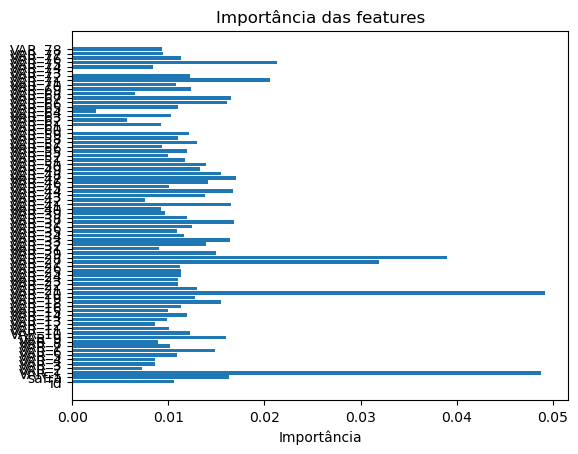

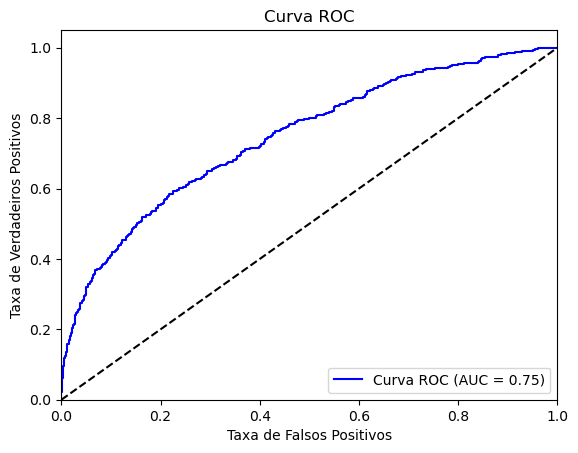

In [113]:
from sklearn.metrics import make_scorer, f1_score, roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(treino.drop(columns='y'), treino['y'], test_size=0.2, random_state=42)

# Calcular o scale_pos_weight -> parametro útil em classes desbalanceadas
neg_count = sum(y_train == 0)
pos_count = sum(y_train == 1)
scale_pos_weight = neg_count / pos_count

# Treinar o modelo XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)
xgb_model.fit(X_train, y_train)

# Obter a importância das características
importance = xgb_model.feature_importances_

# Criar um DataFrame para visualizar a importância
feature_names = X_train.columns.tolist()
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
})

# Filtrar features com importância acima de um determinado limite
threshold = 0.012
selected_features = importance_df[importance_df['Importance'] > threshold]

# Verificar se há características selecionadas
if selected_features.empty:
    print("Nenhuma característica selecionada com a importância especificada.")
else:
    # Filtrar o DataFrame para manter apenas as features selecionadas
    X_train_filter_xgb = X_train[selected_features['Feature']]
    X_test_filter_xgb = X_test[selected_features['Feature']]

    # Avaliar o modelo com as features selecionadas
    xgb_model_filtered = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=scale_pos_weight)  
    xgb_model_filtered.fit(X_train_filter_xgb, y_train)

    # Previsões
    y_pred = xgb_model_filtered.predict(X_test_filter_xgb)
    
    y_pred_proba = xgb_model_filtered.predict_proba(X_test_filter_xgb)[:, 1]  # Probabilidade da classe positiva

    # Calcular o F1 Score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score do modelo XGBoost com features selecionadas:", f1)
    
    # Calcular o AUC
    auc = roc_auc_score(y_test, y_pred_proba)
    print("AUC do modelo XGBoost com features selecionadas:", auc)

    # Exibir relatório de classificação
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

    # Mostrar features selecionadas
    print("\nCaracterísticas selecionadas:")
    print(selected_features)

    print("\nQtd de features selecionadas:")
    print(len(selected_features))

    # Plotar a importância das features
    plt.barh(importance_df['Feature'], importance_df['Importance'])
    plt.xlabel('Importância')
    plt.title('Importância das features')
    plt.show()

 # Plotar a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()


Para avaliar os dois métodos, é importante termos em mente os conceitos das métricas de avaliação, que serão utilizados tanto na etapa de feature selection como avaliação da performance do modelo:

Acurácia: Proporção total de previsões corretas (nº total de previsões corretas/total de previsões). Necessário atenção avaliar apenas acurácia, pois pode levar a conclusões erradas em dados desbalanceados. Quanto mais próximo de 1, melhor.

F1 Score: Média harmônica entre precisão e revocação. Útil para casos de classes desbalanceadas, onde a previsão de ambas as classes precisa estar equilibrada, o que é o caso do case e modelagens aplicadas a decisão de crédito. Quanto mais próximo de 1, melhor.

AUC Score: Em geral, mede a capacidade do modelo de distinguir entre classes, e refere-se à área sob a curva ROC (Receiver Operating Characteristic). A curva ROC é um gráfico que mostra a taxa de verdadeiros positivos (TPR) em função da taxa de falsos positivos (FPR) para diferentes limiares de classificação. Valores abaixo ou iguais a 0.5 indicam que o modelo não é melhor que um classificador aleatório, quanto mais próximo de 1, melhor.

O método escolhido foi o XGBoost utilizando o parâmetro scale_pos_weight, após obter melhores performance avaliando as métricas de acurácia, F1 Score e AUC além de selecionar menos variáveis, o que gera ganhos em termos de otimização de processamento.

# 3.Tuning de HiperParâmetros - GridSearchCV

##### Uma vez definidas as features a serem utilizadas no modelo na etapa anterior, é interessante encontrarmos os hiperparâmetros do modelo que resultem em melhor performance preditiva. Para isto, utilizaremos o GridSearchCV.

In [114]:
# Definindo os parâmetros para otimização
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 7],
    'scale_pos_weight': [1.86, 2.0, 1.5,  1.7]
}
#Definindo a métrica F1_score para otimização
scorer = make_scorer(f1_score)

# Configurar o GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model_filtered, param_grid=param_grid, scoring=scorer, cv=6, verbose=1)

# Ajustar o modelo
grid_search.fit(X_train_filter_xgb, y_train)

# Melhor combinação de parâmetros
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor score:", grid_search.best_score_)


Fitting 6 folds for each of 144 candidates, totalling 864 fits


C:\Users\clecy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:05:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\clecy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:05:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\clecy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:06:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\clecy\anaconda3\Lib\site-packages\

Melhores parâmetros encontrados: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 2.0}
Melhor score: 0.6035000254754309


# 4.Previsão na base de teste final com safras mais recentes (Out of Time)

##### Como ja encontramos as features relevantes para modelagem e os melhores parâmetros na etapa de desenvolvimento do modelo, iremos realizar o teste na base de safras mais recentes para avaliação final da qualidade do modelo

C:\Users\clecy\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:48:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.78      0.69      0.74       337
           1       0.50      0.62      0.55       169

    accuracy                           0.67       506
   macro avg       0.64      0.65      0.64       506
weighted avg       0.69      0.67      0.67       506

F1 Score do modelo: 0.5531914893617021
AUC do modelo: 0.6998753358032062

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.69      0.74       337
           1       0.50      0.62      0.55       169

    accuracy                           0.67       506
   macro avg       0.64      0.65      0.64       506
weighted avg       0.69      0.67      0.67       506



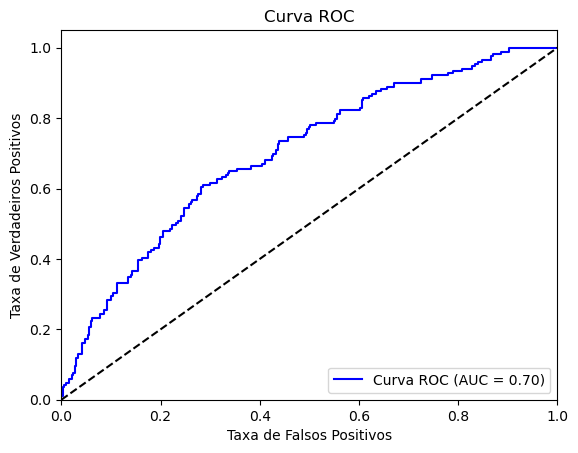

In [125]:
# Dividir o conjunto de avaliação em treino e teste
X_train_oot, X_test_oot, y_train_oot, y_test_oot = train_test_split(oot.drop(columns='y'), oot['y'], test_size=0.2, random_state=42)

# Filtrar o DataFrame para manter apenas as features selecionadas
X_train_filter_oot = X_train_oot[selected_features['Feature']]
X_test_filter_oot = X_test_oot[selected_features['Feature']]

# Fazer previsões no conjunto de teste
best_model = grid_search.best_estimator_  
best_model.fit(X_train_filter_oot, y_train_oot)
y_pred = best_model.predict(X_test_filter_oot)
y_pred_proba = best_model.predict_proba(X_test_filter_oot)[:, 1]  # Probabilidade da classe positiva

# Métricas de desempenho do modelo
print(classification_report(y_test_oot, y_pred))
    
# Calcular o F1 Score
f1 = f1_score(y_test_oot, y_pred)
print("F1 Score do modelo:", f1)
    
# Calcular o AUC
auc = roc_auc_score(y_test_oot, y_pred_proba)
print("AUC do modelo:", auc)

# Exibir relatório de classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test_oot, y_pred))


 # Plotar a curva ROC
fpr, tpr, _ = roc_curve(y_test_oot, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()



In [133]:
y_test_oot.value_counts()

y
0    337
1    169
Name: count, dtype: int64

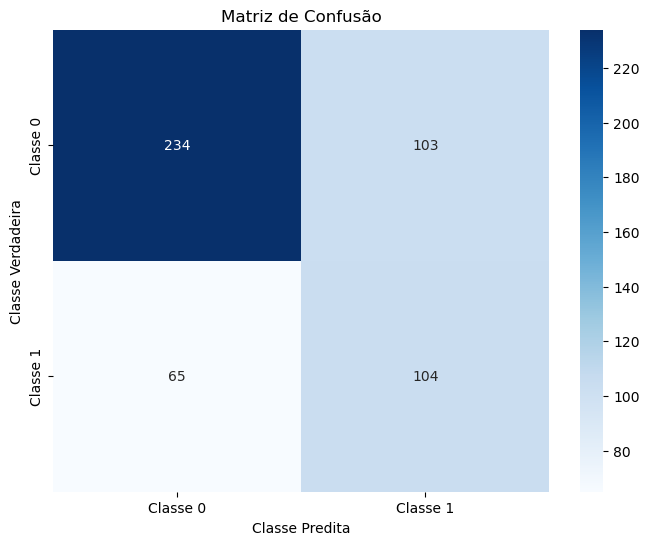

In [127]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Calcular a matriz de confusão
conf_matrix = confusion_matrix(y_test_oot, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')
plt.title('Matriz de Confusão')
plt.show()


# 5.Conclusões

Após avaliarmos as métricas de desempenho, conclui-se que o modelo desenvolvido apresentou performance mediana: é definitivamente melhor que um classificador aleatório (AUC Score de 0.7), porém mostra performances diferentes para cada uma classes, o que consequentemente impacta na performance final. Na classe positiva, acertou 104 dos 169 valores reais (61% de acertos ou Verdadeiros Positivos) e previu erronamente 103 valores como positivos (falsos positivos); enquanto na classe negativa, acertou 234 dos 337 valores reais (69% de acertos ou Verdadeiros Negativos) e assumiu 65 valores como positivos (falsos negativos). 

O comportamento do modelo de prever mais valores marcados como positivos do que o real requer atenção e melhorias, especialmente em contextos de modelagem de crédito, onde hipoteticamente assumindo que o valor positivo seja uma aprovação, podem ocorrer mais aprovações do que o devido, o que também pode ocasionar aumento de inadimplência.

Várias estratégias podem ser adotadas e testadas para melhorar a capacidade preditiva, desde simples a mais complexas, tais como: histórico maior de dados para aumentar as amostras de treino; modelagem não-supervisionada de análise de componentes principais (PCA) prévia, para reduzir a dimensionalidade, remover correlações e redundâncias além de facilitar a identificação de padrões; reamostragem de dados dado o cenário de leve desbalanceamento de classes, com a técnica SMOTE (Synthetic Minority Over-sampling Technique) ou undersampling da classe majoritária; inclusão de outros hiperparâmetros na busca do GridSearch que podem ser úteis. Além disso, outros modelos aplicáveis a problemas de classificação podem ser testados, como o SVM (Support Vector Machine). 
